In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('subset-covid-data.csv')
df.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [4]:
df['date'].value_counts()

2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

### Liệu các quốc gia có số lượng ca mắc mới trong ngày 12-4-2020 giống nhau hay không?

11.5
Số ca nhiễm trung bình là 376.82
Số trung vị của số ca nhiễm mới là 11.5


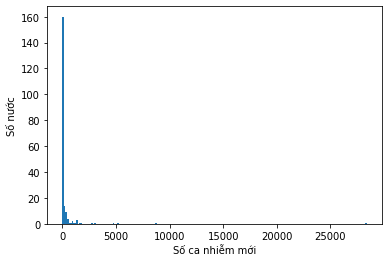

In [5]:
new_df = df[df.date == '2020-04-12']
#new_df['date'].unique()

print(new_df['cases'].median())

print(f'Số ca nhiễm trung bình là {round(new_df.cases.mean(), 2)}')
print(f'Số trung vị của số ca nhiễm mới là {new_df.cases.median()}')

plt.hist(new_df['cases'], bins = 200)
plt.xlabel('Số ca nhiễm mới')
plt.ylabel('Số nước')
plt.show()

### Tổng số lượng người mắc bệnh của từng châu lục

In [6]:
case_by_continent = df.groupby('continent')['cases'].sum()
print(case_by_continent)

continent
Africa       714
America    33519
Asia       12979
Europe     34141
Oceania       68
Other          0
Name: cases, dtype: int64


### Top 5 quốc gia có số lượng ca mắc mới lớn nhất

In [7]:
top_cases = df.sort_values('cases', ascending = False)
top_cases.head(5)

,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


### Tổng số lượng ca tử vong của từng châu lục

In [8]:
dead_by_continent = df.groupby('continent')['deaths'].sum()
print(dead_by_continent)

continent
Africa       52
America    2111
Asia        383
Europe     3571
Oceania       4
Other         0
Name: deaths, dtype: int64


### Top 5 quốc gia có số lượng ca tử vong lớn nhất

In [10]:
top_deaths = df.groupby('country')['deaths'].sum()
top_deaths = df.sort_values('deaths', ascending=False)
top_deaths.head(5)

,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0
